### Real world phenomenon

As we have all heard in the last couple of years we have a serious problem with our outpatient waiting list in the Irish Health Care system. I wanted to look at this data and ascertain where we are 
in relation to waiting lists and specialitites. I was able to dowmload a dataset from data.gov.ie with this information [dataset](https://data.gov.ie/dataset/outpatient-waiting-list/resource/96f88a60-8ea7-4d6a-9c23-8a7c6b740eb0/view/737ac277-c1be-4708-b527-d26f14799008)

In [1]:
# First thing I will do is import the libraries I will need to inspect this dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('OPWAITINGLIST.csv')

In [3]:
df

,ArchiveDate,Adult_Child,Speciality,0-6 Months,6-12 Months,12-18 Months,18+ Months,Total
0,28/10/2021,Adult,Anaesthetics,146,75,172,"1,198","1,591"
1,28/10/2021,Adult,Breast Surgery,"2,856","1,020",447,74,"4,397"
2,28/10/2021,Adult,Cardio-Thoracic Surgery,256,68,15,26,365
3,28/10/2021,Adult,Cardiology,"15,770","7,574","4,391","6,251","33,986"
4,28/10/2021,Adult,Chemical Pathology,76,25,10,8,119
...,...,...,...,...,...,...,...,...
85,28/10/2021,Child,Pain Relief,29,7,4,2,42
86,28/10/2021,Child,Plastic Surgery,911,425,257,620,"2,213"
87,28/10/2021,Child,Rheumatology,223,199,117,795,"1,334"
88,28/10/2021,Child,Small Volume Specialities,48,21,14,17,99


In [4]:
df.describe()

,ArchiveDate,Adult_Child,Speciality,0-6 Months,6-12 Months,12-18 Months,18+ Months,Total
count,90,90,90,90,90,90,90,90
unique,1,2,64,85,76,71,72,87
top,28/10/2021,Adult,General Surgery,223,4,4,2,43
freq,90,46,2,2,5,8,12,2


In [5]:
df.head()

,ArchiveDate,Adult_Child,Speciality,0-6 Months,6-12 Months,12-18 Months,18+ Months,Total
0,28/10/2021,Adult,Anaesthetics,146,75,172,"1,198","1,591"
1,28/10/2021,Adult,Breast Surgery,"2,856","1,020",447,74,"4,397"
2,28/10/2021,Adult,Cardio-Thoracic Surgery,256,68,15,26,365
3,28/10/2021,Adult,Cardiology,"15,770","7,574","4,391","6,251","33,986"
4,28/10/2021,Adult,Chemical Pathology,76,25,10,8,119


In [6]:
df.filter(['Speciality','0-6 Months', '18+ Months']).head()

,Speciality,0-6 Months,18+ Months
0,Anaesthetics,146,"1,198"
1,Breast Surgery,"2,856",74
2,Cardio-Thoracic Surgery,256,26
3,Cardiology,"15,770","6,251"
4,Chemical Pathology,76,8


In [7]:
df.sort_values(by=['Speciality'])

,ArchiveDate,Adult_Child,Speciality,0-6 Months,6-12 Months,12-18 Months,18+ Months,Total
0,28/10/2021,Adult,Anaesthetics,146,75,172,"1,198","1,591"
46,28/10/2021,Child,Breast Surgery,16,4,4,0,24
1,28/10/2021,Adult,Breast Surgery,"2,856","1,020",447,74,"4,397"
2,28/10/2021,Adult,Cardio-Thoracic Surgery,256,68,15,26,365
47,28/10/2021,Child,Cardio-Thoracic Surgery,73,10,4,2,89
...,...,...,...,...,...,...,...,...
88,28/10/2021,Child,Small Volume Specialities,48,21,14,17,99
43,28/10/2021,Adult,Small Volume Specialities,34,21,11,21,88
44,28/10/2021,Adult,Urology,"10,594","5,753","3,368","11,079","30,794"
89,28/10/2021,Child,Urology,883,563,358,"1,018","2,822"


While going through this dataset it doesn't really give me the variables I want to work with. So I have decided to work on another data report which is the ongoing Covid situation. Specifically in Ireland over the last three months. I have downloaded a dataset from data.gov.ie [Covid Dataset](https://data.gov.ie/dataset/covid-19-hpsc-detailed-statistics-profile?package_type=dataset) which I will work on now and look at some of the variables available on this dataset


In [8]:
df = pd.read_csv('COVID_19Report.csv')

In [9]:
df

,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,CovidCasesConfirmed,HospitalisedCovidCases,RequiringICUCovidCases,HealthcareWorkersCovidCases,0-5Hosp,...,15-24Hosp,25-34Hosp,35-44Hosp,45-54Hosp,55-64Hosp,Male,Female,65-74Hosp,75-84Hosp,85upHosp
0,23/08/2021,1592.0,338707.0,NaN,5074.0,335195.0,16096.0,1739.0,31336.0,263.0,...,772.0,1209.0,1393.0,1874.0,2192.0,163121.0,172025.0,2734.0,3327.0,2143.0
1,24/08/2021,1571.0,340278.0,NaN,5074.0,336401.0,16117.0,1741.0,31391.0,265.0,...,776.0,1212.0,1395.0,1876.0,2195.0,163701.0,172651.0,2736.0,3328.0,2145.0
2,25/08/2021,2051.0,342329.0,18.0,5092.0,337857.0,16165.0,1745.0,31456.0,267.0,...,778.0,1214.0,1402.0,1881.0,2198.0,164436.0,173372.0,2743.0,3339.0,2152.0
3,26/08/2021,1866.0,344195.0,NaN,5092.0,339076.0,16225.0,1751.0,31528.0,269.0,...,784.0,1220.0,1406.0,1885.0,2208.0,165031.0,173996.0,2754.0,3348.0,2159.0
4,27/08/2021,1875.0,346070.0,NaN,5092.0,341116.0,16275.0,1758.0,31623.0,270.0,...,786.0,1225.0,1412.0,1891.0,2211.0,166035.0,175032.0,2760.0,3355.0,2170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,04/12/2021,5622.0,589094.0,NaN,5707.0,583420.0,20746.0,2209.0,38593.0,419.0,...,1031.0,1599.0,1901.0,2402.0,2805.0,285684.0,297462.0,3549.0,4117.0,2611.0
104,05/12/2021,5156.0,594250.0,NaN,5707.0,589036.0,20780.0,2209.0,38614.0,419.0,...,1033.0,1604.0,1906.0,2406.0,2808.0,288385.0,300369.0,3557.0,4122.0,2613.0
105,06/12/2021,2950.0,597161.0,NaN,5707.0,594187.0,20789.0,2210.0,38616.0,420.0,...,1035.0,1605.0,1908.0,2407.0,2809.0,290883.0,303014.0,3558.0,4122.0,2613.0
106,07/12/2021,5590.0,602726.0,NaN,5707.0,597136.0,20795.0,2210.0,38616.0,420.0,...,1036.0,1606.0,1910.0,2407.0,2809.0,292339.0,304500.0,3559.0,4123.0,2613.0


In [11]:
df.columns

Index(['Date', 'ConfirmedCovidCases', 'TotalConfirmedCovidCases',
       'ConfirmedCovidDeaths', 'TotalCovidDeaths', 'CovidCasesConfirmed',
       'HospitalisedCovidCases', 'RequiringICUCovidCases',
       'HealthcareWorkersCovidCases', '0-5Hosp', '5-14Hosp', '15-24Hosp',
       '25-34Hosp', '35-44Hosp', '45-54Hosp', '55-64Hosp', 'Male', 'Female',
       '65-74Hosp', '75-84Hosp', '85upHosp'],
      dtype='object')

In [12]:
df.describe()

,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,CovidCasesConfirmed,HospitalisedCovidCases,RequiringICUCovidCases,HealthcareWorkersCovidCases,0-5Hosp,5-14Hosp,15-24Hosp,25-34Hosp,35-44Hosp,45-54Hosp,55-64Hosp,Male,Female,65-74Hosp,75-84Hosp,85upHosp
count,107.000000,107.000000,15.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,2506.205607,433739.196262,42.200000,5355.504673,430885.990654,18327.887850,1972.598131,34858.018692,339.813084,243.682243,910.943925,1404.504673,1629.831776,2129.158879,2466.121495,210312.485981,220465.327103,3109.607477,3699.551402,2388.672897
std,1389.766987,73797.600425,17.660286,200.542442,72917.666959,1426.927094,149.192092,2282.416181,43.605680,34.399319,74.548557,117.739990,153.136854,160.997782,187.874291,35947.021535,36899.676291,258.305865,248.753467,150.270497
min,892.000000,338707.000000,18.000000,5074.000000,335195.000000,16096.000000,1739.000000,31336.000000,263.000000,183.000000,772.000000,1209.000000,1393.000000,1874.000000,2192.000000,163121.000000,172025.000000,2734.000000,3327.000000,2143.000000
25%,1413.500000,374755.000000,28.000000,5179.000000,373327.500000,17108.500000,1850.500000,32871.000000,306.000000,220.000000,851.500000,1306.500000,1499.500000,1992.000000,2307.500000,182003.500000,191272.000000,2887.000000,3479.000000,2253.500000
50%,1914.000000,411554.000000,43.000000,5306.000000,409580.000000,18170.000000,1957.000000,34460.000000,334.000000,242.000000,910.000000,1395.000000,1609.000000,2110.000000,2446.000000,199778.000000,209731.000000,3070.000000,3667.000000,2381.000000
75%,3649.500000,482684.500000,55.500000,5566.000000,479305.500000,19527.500000,2107.000000,36970.000000,371.500000,271.000000,974.500000,1501.500000,1752.000000,2264.500000,2611.000000,233934.000000,245218.500000,3326.000000,3918.500000,2531.000000
max,5959.000000,602726.000000,74.000000,5707.000000,597136.000000,20795.000000,2210.000000,38616.000000,420.000000,306.000000,1036.000000,1606.000000,1910.000000,2407.000000,2809.000000,292339.000000,304500.000000,3559.000000,4123.000000,2613.000000


In [13]:
df.isnull().sum()
# Beacuse the deaths are only reported weekly the daily value for deaths has multiple NAN values as can be seen below on the Confirmed Deaths Column

Date                            1
ConfirmedCovidCases             1
TotalConfirmedCovidCases        1
ConfirmedCovidDeaths           93
TotalCovidDeaths                1
CovidCasesConfirmed             1
HospitalisedCovidCases          1
RequiringICUCovidCases          1
HealthcareWorkersCovidCases     1
0-5Hosp                         1
5-14Hosp                        1
15-24Hosp                       1
25-34Hosp                       1
35-44Hosp                       1
45-54Hosp                       1
55-64Hosp                       1
Male                            1
Female                          1
65-74Hosp                       1
75-84Hosp                       1
85upHosp                        1
dtype: int64

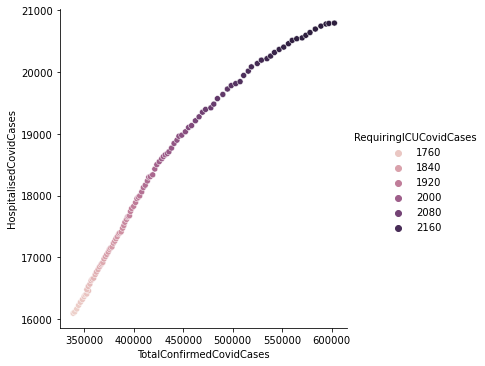

In [22]:
sns.relplot(x='TotalConfirmedCovidCases', y= 'HospitalisedCovidCases', hue='RequiringICUCovidCases',data=df)

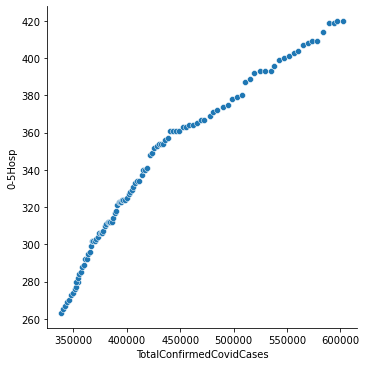

In [23]:
sns.relplot(x='TotalConfirmedCovidCases', y= '0-5Hosp', data=df)

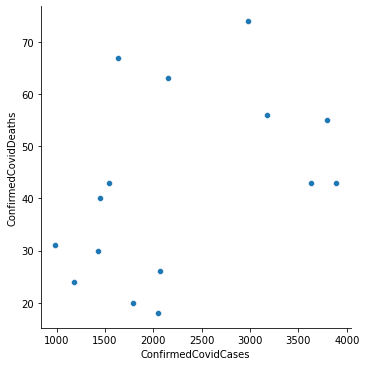

In [19]:
sns.relplot(x='ConfirmedCovidCases', y= 'ConfirmedCovidDeaths', data=df)

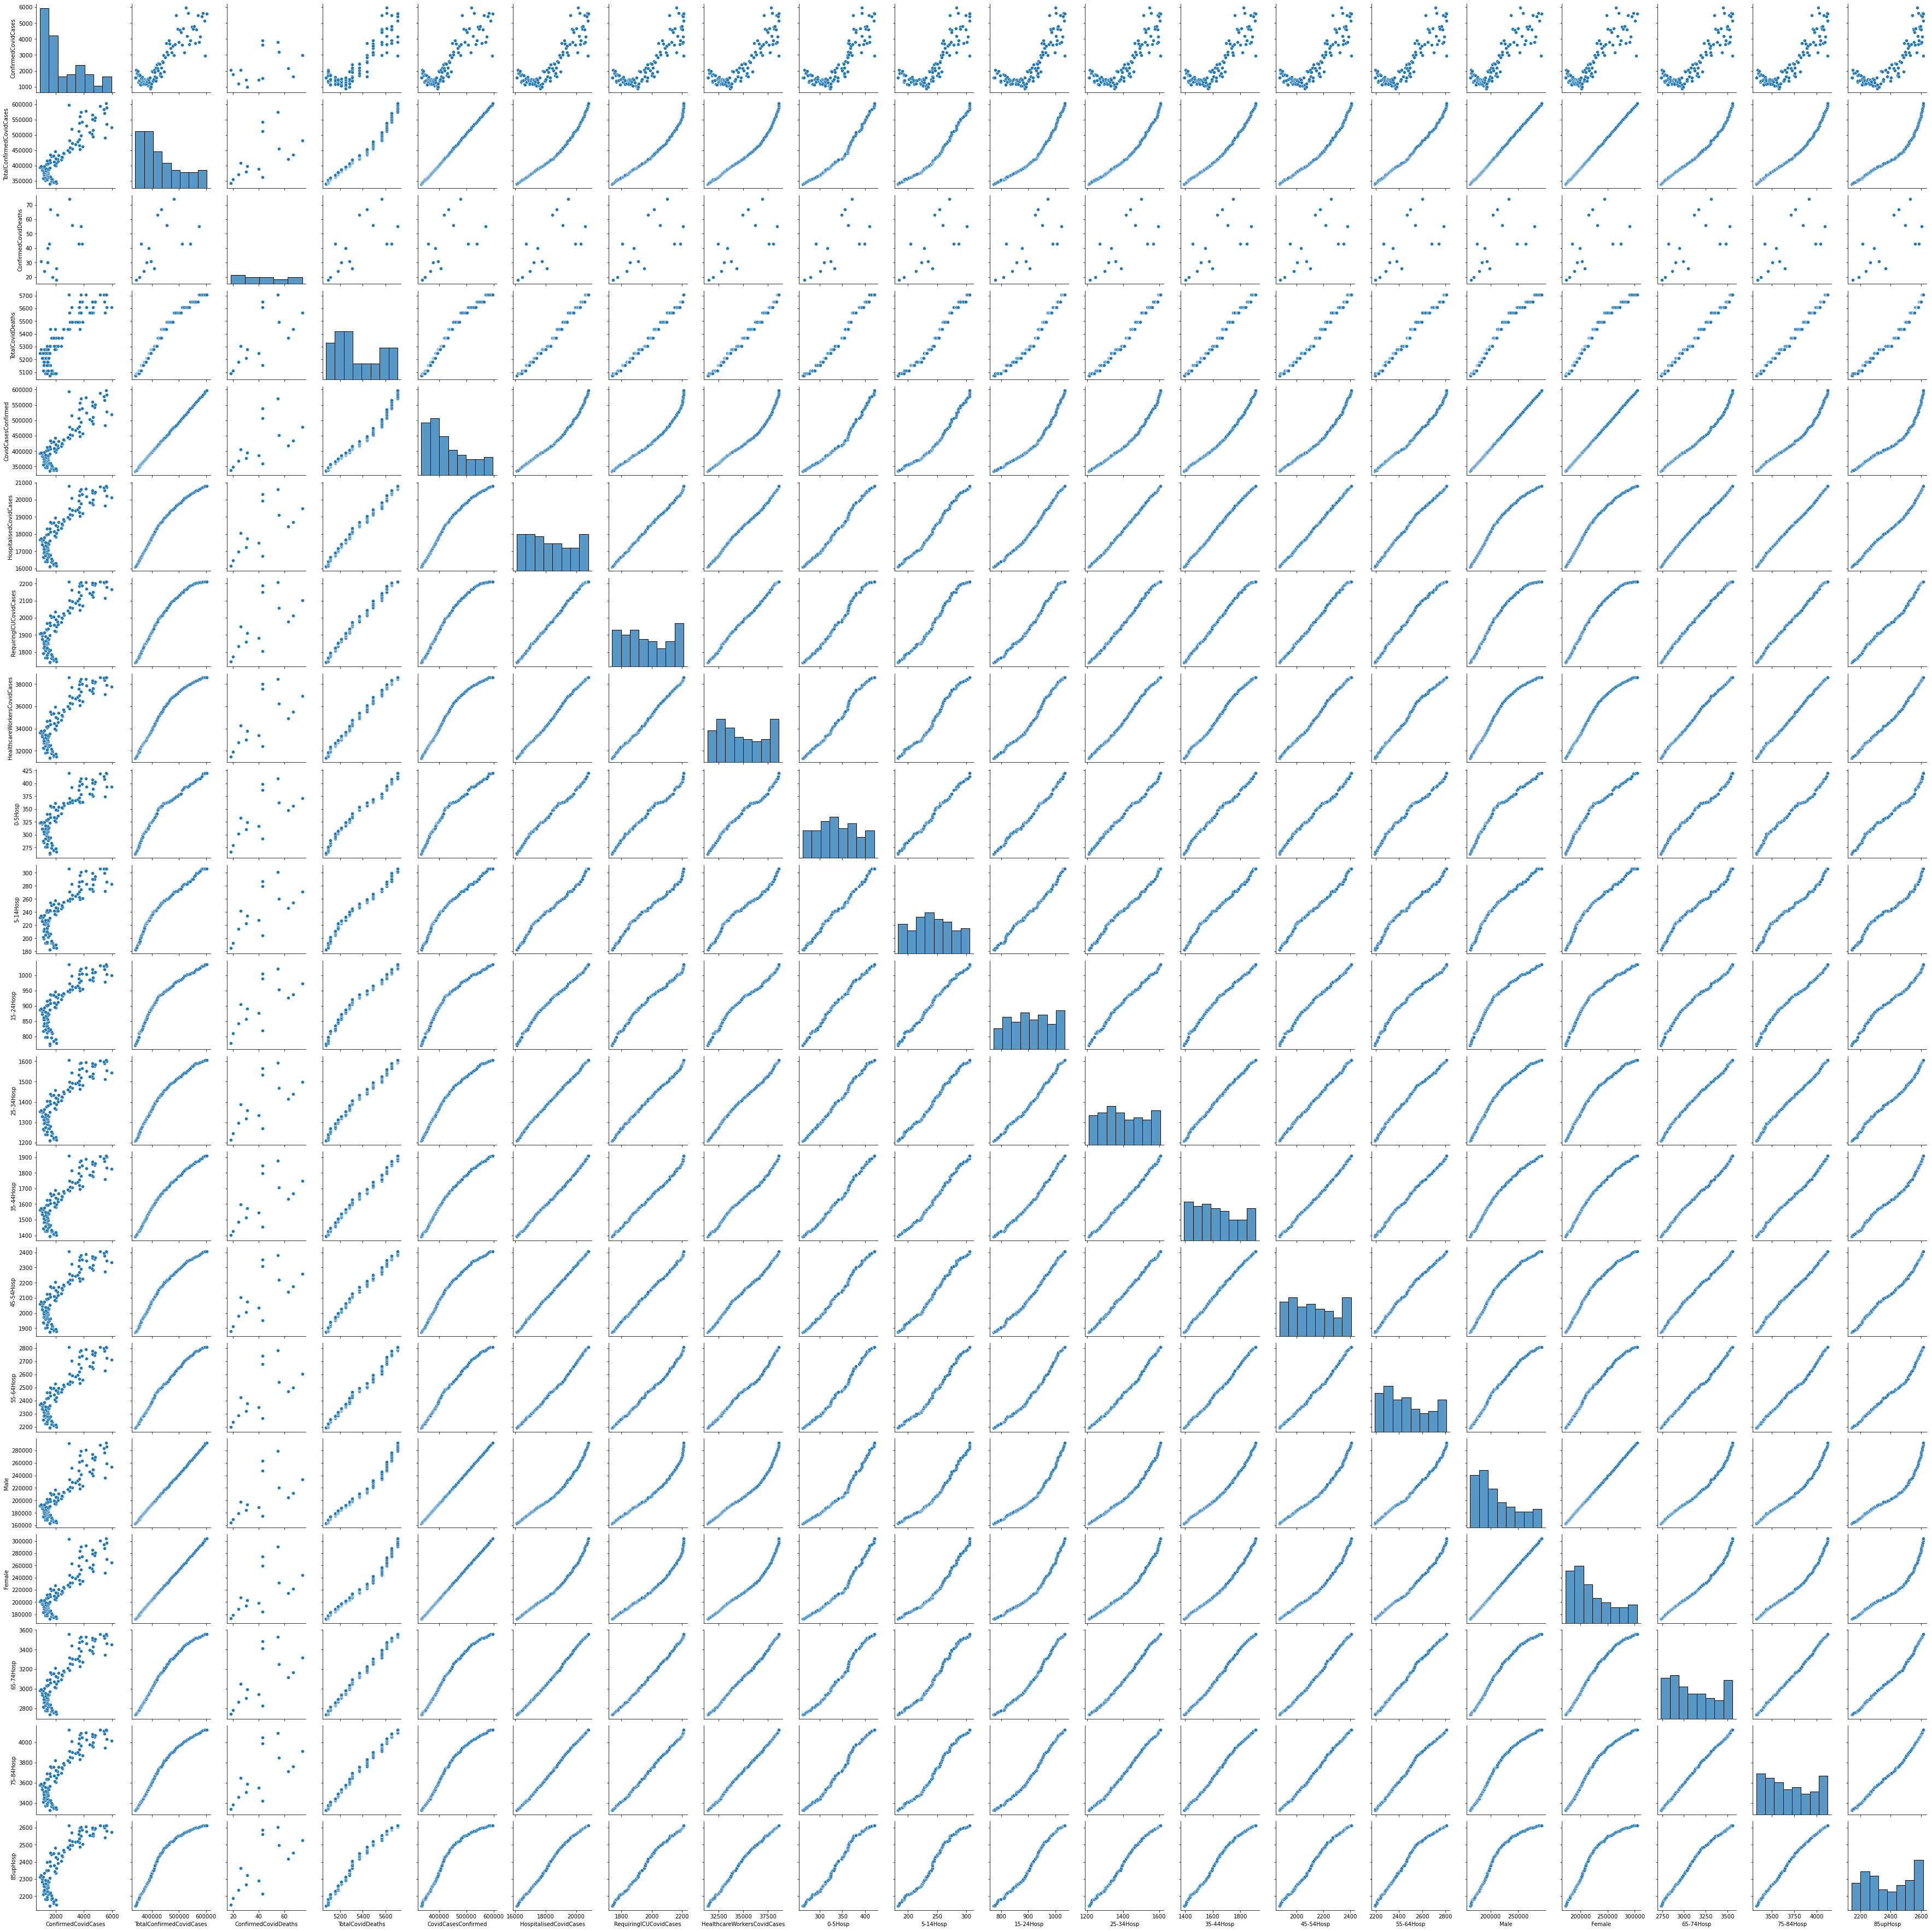

In [24]:
sns.pairplot(df)